## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [10]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [2]:
lh_data = pd.read_csv("lh.csv", na_values="-1")
gold_data = pd.read_csv("gold.csv", na_values="-1")
train_data = pd.read_csv("train.csv", na_values="-1")

In [6]:
lh_data.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


In [5]:
gold_data.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302


In [6]:
train_data.head()

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

In [7]:
train_data.isna().sum() / len(train_data)

mid            0.0
radiant_won    0.0
dtype: float64

In [8]:
lh_data.isna().sum() / len(lh_data)

mid         0.0
times       0.0
player_0    0.0
player_1    0.0
player_2    0.0
player_3    0.0
player_4    0.0
player_5    0.0
player_6    0.0
player_7    0.0
player_8    0.0
player_9    0.0
dtype: float64

In [9]:
gold_data.isna().sum() / len(gold_data)

mid         0.0
times       0.0
player_0    0.0
player_1    0.0
player_2    0.0
player_3    0.0
player_4    0.0
player_5    0.0
player_6    0.0
player_7    0.0
player_8    0.0
player_9    0.0
dtype: float64

*Вывод*: в данных отсутствуют пропущенные значения

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [3]:
train_data_gold_lh = train_data.merge(
    gold_data[gold_data["times"] == 600].add_prefix("gold_"), left_on="mid", right_on="gold_mid", how="inner")
train_data_gold_lh = train_data_gold_lh.merge(
    lh_data[lh_data["times"] == 600].add_prefix("lh_"), left_on="mid", right_on="lh_mid", how="inner")
train_data_gold_lh.drop(["gold_mid", "lh_mid", "gold_times", "lh_times"], axis=1, inplace=True)
train_data_gold_lh

,mid,radiant_won,gold_player_0,gold_player_1,gold_player_2,gold_player_3,gold_player_4,gold_player_5,gold_player_6,gold_player_7,...,lh_player_0,lh_player_1,lh_player_2,lh_player_3,lh_player_4,lh_player_5,lh_player_6,lh_player_7,lh_player_8,lh_player_9
0,0,1,3454,5206,2613,4426,5755,4072,3997,5917,...,4,43,3,57,41,34,35,75,2,46
1,1,0,2477,5760,3816,4353,5759,7659,5066,2748,...,5,63,14,28,47,49,23,3,30,39
2,2,1,3604,1948,8581,4390,2869,3096,2301,5130,...,34,6,69,42,23,6,12,56,13,12
3,4,1,3675,4103,5154,3030,2076,3920,3494,3392,...,30,41,45,23,4,26,9,23,37,6
4,5,1,4252,2412,2545,4264,2544,4752,5389,4954,...,42,5,16,30,3,42,24,53,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,49939,0,4262,7316,3996,3863,2199,5718,3876,4296,...,49,74,30,12,2,47,5,35,39,4
24970,49940,1,7250,3984,6380,2954,6243,3095,5105,1811,...,48,2,54,12,61,26,71,4,49,5
24971,49941,1,2873,4727,4655,4923,3645,5978,2801,3875,...,31,54,42,52,7,49,1,10,16,53
24972,49945,0,2325,1813,2530,4807,5542,2242,2359,5997,...,13,6,2,37,67,7,7,61,49,2


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

Введем следующие агригаты:

  1) Сумма золота всей команды -- чем больше золота, тем больше полезных предметов может купить команда
  
  2) Минимальное и максимальное кол-во золота -- в игре есть четкое дифференцирование по ролям, и одни игроки должны уступать свой "заработок" (добивания крипов, убийства, руны) другим, чтобы те становились сильнее и побеждали в сражениях
  
  3) Те же характеристики для каждой команды основываясь на информации о last hit

In [4]:
train_agregate_data = train_data_gold_lh[["mid", "radiant_won"]].copy()

radiant_players_gold = ["gold_player_" + str(i) for i in range(0, 5)]
radiant_players_lh = ["lh_player_" + str(i) for i in range(0, 5)]
dire_players_gold = ["gold_player_" + str(i) for i in range(5, 10)]
dire_players_lh = ["lh_player_" + str(i) for i in range(5, 10)]

train_agregate_data.loc[:, "radiant_sum_gold"] = train_data_gold_lh[radiant_players_gold].sum(axis=1)
train_agregate_data.loc[:, "radiant_max_gold"] = train_data_gold_lh[radiant_players_gold].max(axis=1)
train_agregate_data.loc[:, "radiant_min_gold"] = train_data_gold_lh[radiant_players_gold].min(axis=1)

train_agregate_data.loc[:, "dire_sum_gold"] = train_data_gold_lh[dire_players_gold].sum(axis=1)
train_agregate_data.loc[:, "dire_max_gold"] = train_data_gold_lh[dire_players_gold].max(axis=1)
train_agregate_data.loc[:, "dire_min_gold"] = train_data_gold_lh[dire_players_gold].min(axis=1)

train_agregate_data.loc[:, "radiant_max_lh"] = train_data_gold_lh[radiant_players_lh].max(axis=1)
train_agregate_data.loc[:, "radiant_min_lh"] = train_data_gold_lh[radiant_players_lh].min(axis=1)
train_agregate_data.loc[:, "radiant_sum_lh"] = train_data_gold_lh[radiant_players_lh].sum(axis=1)

train_agregate_data.loc[:, "dire_max_lh"] = train_data_gold_lh[dire_players_lh].max(axis=1)
train_agregate_data.loc[:, "dire_min_lh"] = train_data_gold_lh[dire_players_lh].min(axis=1)
train_agregate_data.loc[:, "dire_sum_lh"] = train_data_gold_lh[dire_players_lh].sum(axis=1)


train_agregate_data.set_index('mid', inplace=True)
train_agregate_data

,radiant_won,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,dire_min_lh,dire_sum_lh
mid,,,,,,,,,,,,,
0,1,21454,5755,2613,22095,6384,1725,57,3,148,75,2,192
1,0,22165,5760,2477,24536,7659,2748,63,5,157,49,3,144
2,1,21392,8581,1948,15548,5130,2301,69,6,174,56,6,99
4,1,18038,5154,2076,17484,4458,2220,45,4,143,37,6,101
5,1,16017,4264,2412,22041,5389,2992,42,3,96,53,12,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0,21636,7316,2199,20907,5718,2520,74,2,167,47,4,130
49940,1,26811,7250,2954,17305,5105,1811,61,2,177,71,4,155
49941,1,20823,4923,2873,22511,5978,2801,54,7,186,53,1,129


Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

**Логистическая регрессия**:

In [6]:
target = train_agregate_data.pop('radiant_won')

In [60]:
params = {'C' : [1e-5, 1e-3, 1, 100, 1e4]}
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_clf = GridSearchCV(log_reg, params, scoring='roc_auc', n_jobs=-1, cv=5)

In [61]:
log_reg_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [1e-05, 0.001, 1, 100, 10000.0]},
             scoring='roc_auc')

In [87]:
log_reg_clf_res = pd.DataFrame()
for j in range(len(params['C'])):
    log_reg_clf_res[params['C'][j]] = [log_reg_clf.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)]    

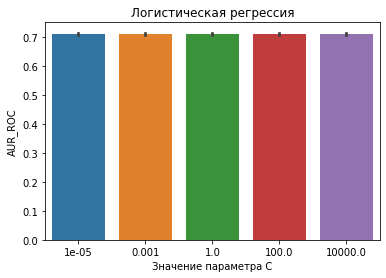

In [88]:
fig = sns.barplot(data=log_reg_clf_res, palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
plt.title("Логистическая регрессия")
pass

Посмотрим на веса получившейся модели:

In [72]:
log_reg_clf.best_estimator_.coef_

array([[ 2.44533395e-04,  3.92914237e-05, -1.13396030e-04,
        -2.19170501e-04, -7.15436925e-05,  2.67011824e-05,
         1.24383483e-02, -6.15641239e-03, -5.57099768e-03,
        -1.25802281e-02,  1.06971746e-02,  5.15875635e-03]])

Так они достаточно малые, то оценка качества почти не отличается при разных значениях гиперпараметра.

**Метод опорных векторов:**

In [73]:
svc_parms = {'C': [0.01, 0.1, 1, 10]}
            
svc = LinearSVC(max_iter=20000, penalty='l1', dual=False, verbose = True)
svc_clf = GridSearchCV(svc, svc_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [74]:
svc_clf.fit(train_agregate_data, target)

[LibLinear]

GridSearchCV(cv=5,
             estimator=LinearSVC(dual=False, max_iter=20000, penalty='l1',
                                 verbose=True),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc')

In [95]:
svc_clf_res = pd.DataFrame()
for j in range(len(svc_parms['C'])):
    svc_clf_res[svc_parms['C'][j]] = [svc_clf.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)]    

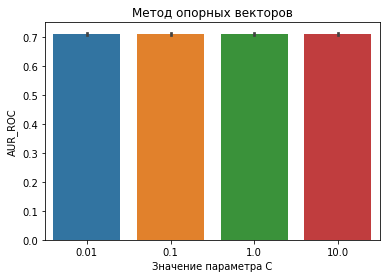

In [96]:
fig_svc = sns.barplot(data=svc_clf_res, palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
plt.title("Метод опорных векторов")
pass

Здесь различия также малозаметны.

**Многослойный персетрон:**

In [92]:
perceptron = MLPClassifier(activation='logistic')
mplr_params = {'hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2]}
mplr_clf = GridSearchCV(perceptron, mplr_params, scoring='roc_auc', n_jobs=-1, cv=5)

In [93]:
mplr_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5, estimator=MLPClassifier(activation='logistic'), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19,
                                                17, 15, 13, 10, 8, 5, 2]},
             scoring='roc_auc')

In [97]:
mplr_clf_res = pd.DataFrame()
for j in range(len(mplr_params['hidden_layer_sizes'])):
    mplr_clf_res[mplr_params['hidden_layer_sizes'][j]] = [mplr_clf.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)]    

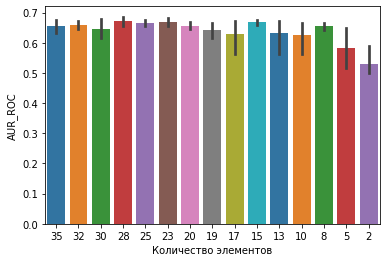

In [98]:
fig_mlp = sns.barplot(data=mplr_clf_res, palette="tab10")
plt.xlabel("Количество элементов")
plt.ylabel("AUR_ROC")
pass

In [213]:
print("Качество лог. регрессии", log_reg_clf.best_score_)
print("Качество метода опорных векторов", svc_scale_clf.best_score_)
print("Качество MLP", mplr_scale_clf.best_score_)

Качество лог. регрессии 0.7116408670965901
Качество метода опорных векторов 0.711522528484537
Качество MLP 0.7115501929877207


**Вывод:** лучше всех себя показала логистическая регрессия.

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Для анализа возьмем одну колонку какого-нибудь игрока в данных о золоте и добиваниях. Расмотрим стандартные характеристики среднее значение и диспресия (так как у нас много данных, то по одной колонке мы может говорить о харакетере всего датасета).

In [32]:
print(gold_data["player_0"].describe())
print('-' * 20)
print(lh_data["player_0"].describe())

count    499480.000000
mean       2152.879521
std        1431.458854
min         168.000000
25%        1010.000000
50%        1876.000000
75%        3006.000000
max       15046.000000
Name: player_0, dtype: float64
--------------------
count    499480.000000
mean         14.600811
std          14.283622
min           1.000000
25%           3.000000
50%           9.000000
75%          23.000000
max         113.000000
Name: player_0, dtype: float64


Мы видим, что данные очень отличаются и по среднему и по дисперсии.

In [33]:
print(train_agregate_data["radiant_sum_gold"].describe())
print('-' * 20)
print(train_agregate_data["radiant_max_lh"].describe())

count    24974.000000
mean     20089.322535
std       2614.068298
min      11247.000000
25%      18316.250000
50%      19929.000000
75%      21666.000000
max      47074.000000
Name: radiant_sum_gold, dtype: float64
--------------------
count    24974.000000
mean        51.800753
std         13.038086
min         13.000000
25%         42.000000
50%         51.000000
75%         60.000000
max        131.000000
Name: radiant_max_lh, dtype: float64


Еще сильнее данные разнятся на наших агрегатных признаках.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [99]:
log_reg_pipe = Pipeline([('scale', StandardScaler()), 
                        ('log_reg', LogisticRegression(max_iter=100000, solver='liblinear'))])


log_reg_scale_params = {'log_reg__C' : [1e-5, 1e-3, 1, 100, 1e4]}                        

log_reg_clf_scaled = GridSearchCV(log_reg_pipe, log_reg_scale_params, scoring='roc_auc', n_jobs=-1, cv=5)

In [100]:
log_reg_clf_scaled.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [1e-05, 0.001, 1, 100, 10000.0]},
             scoring='roc_auc')

In [103]:
log_reg_scaled_clf_res = pd.DataFrame()
for j in range(len(log_reg_scale_params['log_reg__C'])):
    log_reg_scaled_clf_res[log_reg_scale_params['log_reg__C'][j]] = [log_reg_clf_scaled.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)]    

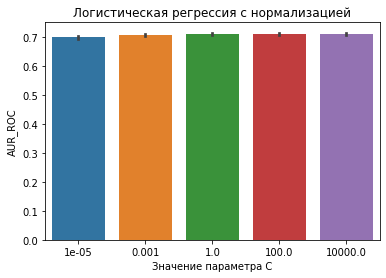

In [105]:
fig = sns.barplot(data=log_reg_scaled_clf_res, palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
plt.title("Логистическая регрессия с нормализацией")
pass

In [124]:
svc_pipe = Pipeline([('scale', StandardScaler()), 
                        ('svc', LinearSVC(max_iter=20000))])

svc_scale_parms = {'svc__C': np.linspace(0.1, 5, 7)}

svc_scale_clf = GridSearchCV(svc_pipe, svc_scale_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [125]:
svc_scale_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', LinearSVC(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'svc__C': array([0.1       , 0.91666667, 1.73333333, 2.55      , 3.36666667,
       4.18333333, 5.        ])},
             scoring='roc_auc')

In [226]:
svc_scale_clf_res = pd.DataFrame()
for j in range(len(svc_scale_parms['svc__C'])):
    svc_scale_clf_res[svc_scale_parms['svc__C'][j]] = \
    [svc_scale_clf.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)] 
    
svc_scale_clf_res.columns = [0.1, 0.92, 1.73, 2.55, 3.37, 4.18, 5]

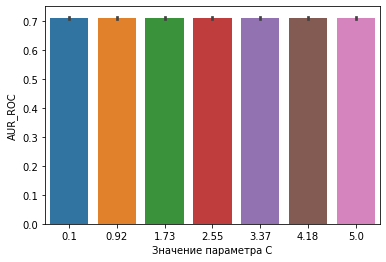

In [227]:
fig = sns.barplot(data=svc_scale_clf_res, palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [111]:
perceptron_pipe = Pipeline([('scale', StandardScaler()),
                            ('perc', MLPClassifier(activation='logistic'))]);
                           
perceptron_scale_parms = {'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2]}
                            
mplr_scale_clf = GridSearchCV(perceptron_pipe, perceptron_scale_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [112]:
mplr_scale_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('perc',
                                        MLPClassifier(activation='logistic'))]),
             n_jobs=-1,
             param_grid={'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23,
                                                      20, 19, 17, 15, 13, 10, 8,
                                                      5, 2]},
             scoring='roc_auc')

In [113]:
mplr_scale_clf_res = pd.DataFrame()
for j in range(len(perceptron_scale_parms['perc__hidden_layer_sizes'])):
    mplr_scale_clf_res[perceptron_scale_parms['perc__hidden_layer_sizes'][j]] = [mplr_scale_clf.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)]    

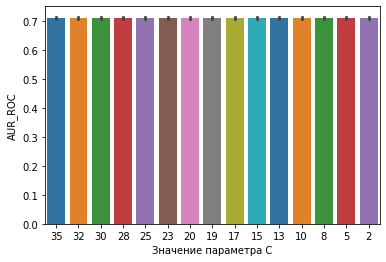

In [114]:
fig = sns.barplot(data=mplr_scale_clf_res, palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

**Вывод:** Качество значительно не улучшилось, это связанно с природой моделей.

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

In [131]:
from sklearn.pipeline import Pipeline
log_reg_pipe_multy = Pipeline([('scale', StandardScaler()), 
                        ('log_reg', LogisticRegression(max_iter=100000, solver='liblinear'))])


log_reg_scale_params_multy = {'log_reg__penalty' : ['l1', 'l2'],
                              'log_reg__C' : [i for i in np.logspace(-3, 3, 7)]}                        

log_reg_clf_multy = GridSearchCV(log_reg_pipe_multy, log_reg_scale_params_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [132]:
log_reg_clf_multy.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                        1000.0],
                         'log_reg__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [186]:
def GetData(clf, number, label):
    log_reg_val = []
    log_reg_reg = []
    log_reg_score = []
    for i in range(len(clf.cv_results_['params'])):
        c = clf.cv_results_['params'][i][number]
        penalty = clf.cv_results_['params'][i][label]
        for j in range(5):
            log_reg_val.append(c)
            log_reg_reg.append(penalty)
            log_reg_score.append(clf.cv_results_['split' + str(j) + '_test_score'][i])


    data = pd.DataFrame()
    data['val'] = log_reg_val
    data['reg'] = log_reg_reg
    data['score'] = log_reg_score
    
    return data

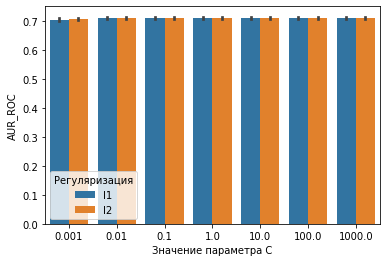

In [187]:
fig = sns.barplot(x='val', y='score', hue='reg', data=GetData(log_reg_clf_multy, 'log_reg__C', 'log_reg__penalty'),
            palette="tab10")
plt.legend(title="Регуляризация")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

При значениях больше 0,1 качество почти не отличается при обоих видах регуляризации

In [138]:
svc_pipe_multy = Pipeline([('scale', StandardScaler()), 
                        ('svc', LinearSVC(max_iter=20000, loss='squared_hinge', dual=False))])

svc_scale_parms_multy = {'svc__C': list(range(1, 10)),
                  'svc__penalty' : ['l1', 'l2']}

svc_scale_clf_multy = GridSearchCV(svc_pipe_multy, svc_scale_parms_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [218]:
svc_scale_clf_multy.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=20000))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'svc__penalty': ['l1', 'l2']},
             scoring='roc_auc')

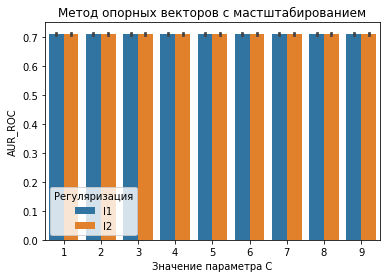

In [188]:
fig = sns.barplot(x='val', y='score', hue='reg', data=GetData(svc_scale_clf_multy, 'svc__C', 'svc__penalty'),
            palette="tab10")
plt.legend(title="Регуляризация")
plt.title("Метод опорных векторов с мастштабированием")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

При обоих видах регуляризации качество почти одинаково

In [142]:
perceptron_pipe = Pipeline([('scale', StandardScaler()),
                            ('perc', MLPClassifier(activation='logistic'))]);
                           
perceptron_scale_parms_multy = {'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2],
                               'perc__activation' : ['logistic', 'relu']}
                            
mplr_scale_clf_multy = GridSearchCV(perceptron_pipe, perceptron_scale_parms_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [219]:
mplr_scale_clf_multy.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('perc',
                                        MLPClassifier(activation='logistic'))]),
             n_jobs=-1,
             param_grid={'perc__activation': ['logistic', 'relu'],
                         'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23,
                                                      20, 19, 17, 15, 13, 10, 8,
                                                      5, 2]},
             scoring='roc_auc')

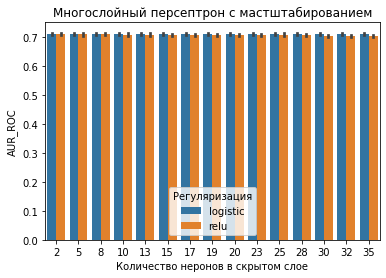

In [220]:
fig = sns.barplot(x='val', y='score', hue='reg', data=GetData(mplr_scale_clf_multy, 'perc__hidden_layer_sizes', 'perc__activation'),
            palette="tab10")
plt.legend(title="Регуляризация")
plt.title("Многослойный персептрон с мастштабированием")
plt.xlabel("Количество неронов в скрытом слое")
plt.ylabel("AUR_ROC")
pass

При разных функция активации различия минимальны:

In [177]:
print("Качество лог. регрессии", log_reg_clf_multy.best_score_)
print("Качество метода опорных векторов", svc_scale_clf_multy.best_score_)
print("Качество MLP", mplr_scale_clf_multy.best_score_)

Качество лог. регрессии 0.7115593015154283
Качество метода опорных векторов 0.7115218531698811
Качество MLP 0.7116496140988368


**Вывод**: лучшим по метрике качества является явлется многослойный перцетрон, вторым же логистическая регрессия. Однако различия очень малы и могут являться случайными. В общем, все модели очень близки.

### Добавление категориальных признаков в модели

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [8]:
from sklearn.model_selection import learning_curve

In [55]:
log_reg_sizes, log_reg_train, log_reg_test = learning_curve(log_reg_clf_multy, 
                                                            X=train_agregate_data, 
                                                            y=target, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='roc_auc',
                                                            return_times=False)

svс_sizes, svс_train, svс_test = learning_curve(svc_scale_clf_multy, 
                                                X=train_agregate_data, 
                                                y=target, 
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                scoring='roc_auc',
                                                return_times=False)

mlp_sizes, mlp_train, mlp_test = learning_curve(Pipeline([('scale', StandardScaler()),
                            ('perc', MLPClassifier(activation='logistic', hidden_layer_sizes=5))], 
                                                X=train_agregate_data, 
                                                y=target, 
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                scoring='roc_auc',
                                                return_times=False)

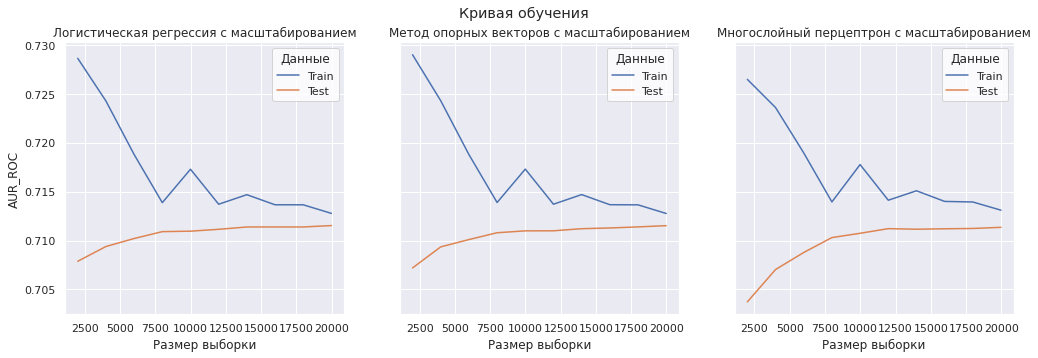

In [143]:
names = ['log_reg', 'svc', 'mlp']
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(17, 5))
sns.set_theme({"axes.facecolor": "white"})

sizes = [log_reg_sizes, svс_sizes, mlp_sizes]
train = [log_reg_train.mean(-1), svс_train.mean(-1), mlp_train.mean(-1)]
test = [log_reg_test.mean(-1), svс_test.mean(-1), mlp_test.mean(-1)]
names = ['Логистическая регрессия', 'Метод опорных векторов', 'Многослойный перцептрон']

for i in range(3):
    sns.lineplot(ax = axes[i], x=sizes[i], y=train[i], label='Train')
    sns.lineplot(ax = axes[i], x=sizes[i], y=test[i], label='Test')
    axes[i].legend(title="Данные", frameon=True, facecolor='white')
    axes[i].set_title(names[i] + " с масштабированием")
    axes[i].set(xlabel="Размер выборки", ylabel="AUR_ROC")
    
fig.suptitle("Кривая обучения")
pass

**Вывод:**

1) При увеличении числа объектов качество на тестовой выборке убывает, это значит, что модель находит настоящие зависимотси в данных. Если же она будет расти, то модель переобучается.

2) Можно узнать о переобучение, а также видно, может ли добавление данных улучшить качество модели.

3) Логистическая регрессия и метод опорных векторов ведут себя примерно одиннаково и выигрывают у многослойного перцептрона

4) Для всех алгоритмов произошло насыщение, так как качество на обущающей и тествой выборке приблизилось к друг другу.

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [12]:
from sklearn.preprocessing import OneHotEncoder
heros_data = pd.read_csv("heroes.csv", index_col='mid')

In [13]:
encoder = OneHotEncoder(sparse=False)

radiant = pd.DataFrame()

radiant = encoder.fit_transform(heros_data[["player_0"]])+ encoder.fit_transform(heros_data[["player_1"]]) + \
            encoder.fit_transform(heros_data[["player_2"]]) + encoder.fit_transform(heros_data[["player_3"]]) + \
encoder.fit_transform(heros_data[["player_4"]])

dire =  ( encoder.fit_transform(heros_data[["player_5"]]) + encoder.fit_transform(heros_data[["player_6"]]) + \
    encoder.fit_transform(heros_data[["player_7"]]) + encoder.fit_transform(heros_data[["player_8"]])  + \
    encoder.fit_transform(heros_data[["player_9"]]))

In [14]:
heroes_encoded = pd.DataFrame(np.hstack((radiant, dire)), columns=["radiant_hero_" + str(i) for i in range(0, radiant.shape[1])] + \
                              ["dire_hero_" + str(i) for i in range(0, dire.shape[1])])

In [109]:
heroes_encoded.sum(axis=1)

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
49943    10.0
49944    10.0
49945    10.0
49946    10.0
49947    10.0
Length: 49948, dtype: float64

Как и было необходимо, сумма каждой строчки равна 10.

In [15]:
train_with_heroes = train_agregate_data.join(heroes_encoded)
train_with_heroes

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,dire_hero_101,dire_hero_102,dire_hero_103,dire_hero_104,dire_hero_105,dire_hero_106,dire_hero_107,dire_hero_108,dire_hero_109,dire_hero_110
mid,,,,,,,,,,,,,,,,,,,,,
0,21454,5755,2613,22095,6384,1725,57,3,148,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22165,5760,2477,24536,7659,2748,63,5,157,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21392,8581,1948,15548,5130,2301,69,6,174,56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18038,5154,2076,17484,4458,2220,45,4,143,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16017,4264,2412,22041,5389,2992,42,3,96,53,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,21636,7316,2199,20907,5718,2520,74,2,167,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49940,26811,7250,2954,17305,5105,1811,61,2,177,71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49941,20823,4923,2873,22511,5978,2801,54,7,186,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

In [17]:
log_reg_heroes_pipe_multy = Pipeline([
    # Применям мастшабирование только к вещественным признакам
    ('scale', make_column_transformer((StandardScaler(), train_with_heroes.columns[:12]), remainder='passthrough')), 
    ('log_reg', LogisticRegression(max_iter=100000, solver='liblinear'))])


log_reg_heroes_scale_params_multy = {'log_reg__penalty' : ['l1', 'l2'],
                              'log_reg__C' : [i for i in np.logspace(-3, 3, 7)]}                        

log_reg_heroes_clf_multy = GridSearchCV(log_reg_heroes_pipe_multy, log_reg_heroes_scale_params_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [18]:
log_reg_heroes_clf_multy.fit(train_with_heroes, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['radiant_sum_gold', 'radiant_max_gold', 'radiant_min_gold',
       'dire_sum_gold', 'dire_max_gold', 'dire_min_gold', 'radiant_max_lh',
       'radiant_min_lh', 'radiant_sum_lh', 'dire_max_lh', 'dire_min_lh',
       'dire_sum_lh'],
      dtype='object'))])),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                  

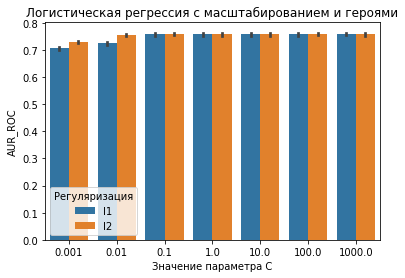

In [192]:
fig = sns.barplot(x='val', y='score', hue='reg', data=GetData(log_reg_heroes_clf_multy, 'log_reg__C', 'log_reg__penalty'),
            palette="tab10")
plt.legend(title="Регуляризация")
plt.title("Логистическая регрессия с масштабированием и героями")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [195]:
svc_heroes_pipe_multy = Pipeline([
    ('scale', make_column_transformer((StandardScaler(), train_with_heroes.columns[:12]), remainder='passthrough')), 
    ('svc', LinearSVC(max_iter=20000, loss='squared_hinge', dual=False))])

svc_scale_heroes_parms_multy = {'svc__C': np.logspace(-3, 3, num=7),
                  'svc__penalty' : ['l1', 'l2']}

svc_scale_heroes_clf_multy = GridSearchCV(svc_heroes_pipe_multy, svc_scale_heroes_parms_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [196]:
svc_scale_heroes_clf_multy.fit(train_with_heroes, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['radiant_sum_gold', 'radiant_max_gold', 'radiant_min_gold',
       'dire_sum_gold', 'dire_max_gold', 'dire_min_gold', 'radiant_max_lh',
       'radiant_min_lh', 'radiant_sum_lh', 'dire_max_lh', 'dire_min_lh',
       'dire_sum_lh'],
      dtype='object'))])),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=20000))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         

In [197]:
svc_scale_heroes_parms_multy_scores = pd.DataFrame()
svc_scale_heroes_parms_multy_scores['val'] = [C['svc__C'] for C in svc_scale_heroes_clf_multy.cv_results_['params']]
svc_scale_heroes_parms_multy_scores['reg'] = [C['svc__penalty'] for C in svc_scale_heroes_clf_multy.cv_results_['params']]
svc_scale_heroes_parms_multy_scores['score'] = svc_scale_heroes_clf_multy.cv_results_['mean_test_score']        

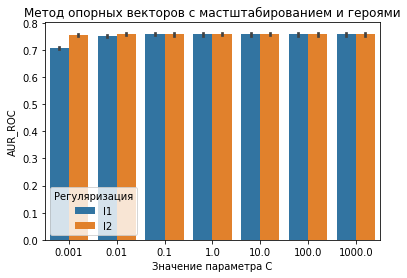

In [198]:
fig = sns.barplot(x='val', y='score', hue='reg', data=GetData(svc_scale_heroes_clf_multy, 'svc__C', 'svc__penalty'),
            palette="tab10")
plt.legend(title="Регуляризация")
plt.title("Метод опорных векторов с мастштабированием и героями")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [215]:
perceptron_heroes_pipe = Pipeline([
    ('scale', make_column_transformer((StandardScaler(), train_with_heroes.columns[:12]), remainder='passthrough')), 
    ('perc', MLPClassifier(activation='logistic'))]);
                           
perceptron_scale_heroes_parms_multy = {'perc__hidden_layer_sizes': [17, 15, 13, 10, 8, 5, 2],
                               'perc__activation' : ['logistic', 'relu']}
                            
mplr_scale__heroes_clf_multy = GridSearchCV(perceptron_heroes_pipe, perceptron_scale_heroes_parms_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [216]:
mplr_scale__heroes_clf_multy.fit(train_with_heroes, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['radiant_sum_gold', 'radiant_max_gold', 'radiant_min_gold',
       'dire_sum_gold', 'dire_max_gold', 'dire_min_gold', 'radiant_max_lh',
       'radiant_min_lh', 'radiant_sum_lh', 'dire_max_lh', 'dire_min_lh',
       'dire_sum_lh'],
      dtype='object'))])),
                                       ('perc',
                                        MLPClassifier(activation='logistic'))]),
             n_jobs=-1,
             param_grid={'perc__activation': ['logistic', 'relu'],
                         'perc__hidden_layer_sizes': [17, 15, 13, 10, 8, 5, 2]},
             scoring='roc_a

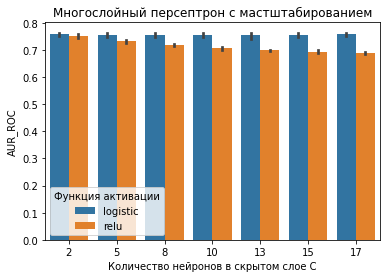

In [217]:
fig = sns.barplot(x='val', y='score', hue='reg', data=GetData(mplr_scale__heroes_clf_multy, 'perc__hidden_layer_sizes', 'perc__activation'),
            palette="tab10")
plt.legend(title="Функция активации")
plt.title("Многослойный персептрон с мастштабированием")
plt.xlabel("Количество нейронов в скрытом слое C")
plt.ylabel("AUR_ROC")
pass

In [221]:
print("Качество лог. регрессии ", log_reg_heroes_clf_multy.best_score_)
print("Качество метода опорных векторов ", svc_scale_heroes_clf_multy.best_score_)
print("Качество MLP ", mplr_scale__heroes_clf_multy.best_score_)

Качество лог. регрессии  0.7591468149288735
Качество метода опорных векторов  0.7590743027979692
Качество MLP  0.7585559560771882


**Вывод:** после добавления героев качество повысилось и лучшим алгоритмом стала логистическая регрессия. Так же заметим, что многослойный перцептор стал немного хуже остальных алгоритмов.

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [30]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

In [31]:
class BlendedEstimator(BaseEstimator):
    def __init__(self, first_clf = LogisticRegression(), second_clf = LinearSVC(), coef = 0.5):
        self.first_clf = first_clf
        self.second_clf = second_clf
        self.coef = coef
        
    def fit(self, X, y):
        self.first_clf.fit(X, y)
        self.second_clf.fit(X, y)
        return self
        
    def predict(self, X):
        check_is_fitted(self)
        return (self.first_clf.predict_proba(X) * self.coef + self.second_clf.predict_proba(X) * (1 - self.coef)) > 0.5
    
    def predict_proba(self, X):
        return self.first_clf.decision_function(X) * self.coef + self.second_clf.decision_function(X) * (1 - self.coef)
    
    def decision_function(self, X):
        return self.first_clf.decision_function(X) * self.coef + self.second_clf.decision_function(X) * (1 - self.coef)

**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [207]:
blended_parms = {'coef' : np.linspace(0.1, 1, 10)}

blended_clf = GridSearchCV(BlendedEstimator(log_reg_heroes_clf_multy.best_estimator_, svc_scale_heroes_clf_multy.best_estimator_),
                           blended_parms, 
                           scoring='roc_auc', n_jobs=-1, cv=5)

In [208]:
blended_clf.fit(train_with_heroes, target)

GridSearchCV(cv=5,
             estimator=BlendedEstimator(first_clf=Pipeline(steps=[('scale',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('standardscaler',
                                                                                                    StandardScaler(),
                                                                                                    Index(['radiant_sum_gold', 'radiant_max_gold', 'radiant_min_gold',
       'dire_sum_gold', 'dire_max_gold', 'dire_min_gold', 'radiant_max_lh',
       'radiant_min_lh', 'radiant_sum_lh', 'dire_max_lh', 'd...
                                                                                                     Index(['radiant_sum_gold', 'radiant_max_gold', 'radiant_min_gold',
       'dire_sum_gold', 'dire_max_gold', 'dire_min_gold', 'radiant_max_lh',
       '

In [223]:
blended_clf_res = pd.DataFrame()
for j in range(len(blended_parms['coef'])):
    blended_clf_res[blended_parms['coef'][j]] = [blended_clf.cv_results_['split' + str(i) + '_test_score'][j] for i in range(5)]  
    
blended_clf_res.columns = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]

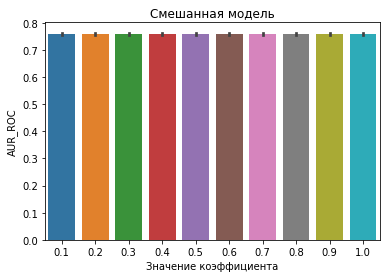

In [228]:
fig = sns.barplot(data=blended_clf_res,
            palette="tab10")
plt.title("Смешанная модель")
plt.xlabel("Значение коэффициента")
plt.ylabel("AUR_ROC")
pass

**Вывод:** качество почти не изменилось

Блендинг может сильно повлиять, когда, например одна модель хорошо показывает себя на одном наборе данных, а другая на другом наборе, поэтому при смешивании они хорошо показывают себя на большем наборе данных

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [53]:
clf_data = pd.DataFrame()

models = [log_reg_heroes_clf_multy, svc_scale_heroes_clf_multy, mplr_scale__heroes_clf_multy, blended_clf]
columns= ['Log reg', 'SVC', 'MLP', "Blended"]

for name, model in zip(columns, models):
    clf_data[name] = [model.cv_results_['split' + str(i) + '_test_score'][model.best_index_] for i in range(5)]


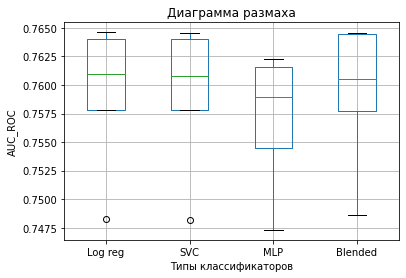

In [59]:
clf_data.boxplot()
plt.title("Диаграмма размаха")
plt.xlabel("Типы классификаторов")
plt.ylabel("AUC_ROC")
pass

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.

**Вывод:** в ходе экспериментов было выяснено:

1) На наших данных изменение гиперпараметров для логистической регрессии и метода опорных векторов почти не влияет на качество, так получившиеся веса достаточно малы, однако изменение гиперпараметров многослойного прецептрона (количество нейронов) имеет сильное влияние

2) Мастштаб данных не влияет на качество представленных моделей, однако может изменять время обучения моделей

3) Смешивание моделей почти никак не улучшает результат, что может быть связано с похожестью использованных моделей

4) Многослойный перцептрон, в отличие о логистической регрессии и метода опорны векторов, плохо реагирует на большое число признаков (хорошо видно после добавления информации о героях)